# How to visualize 1-dimentional data?
common ways in visualizing one-dimensional data:
1. Histograms
2. Bee-Swarms
3. Box plots
4. Violin plots
5. CDF

In [2]:
# load libraries and load datasets, viewing first 10 entires and shape
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = np.loadtxt('example_1.txt')
df2 = np.loadtxt('example_2.txt')

print(df1.shape, df2.shape)
print(df1[:10], df2[:10])

(500,) (500,)
[13.995 13.125 13.508 14.22  13.478 16.247 14.954 13.388 12.225 12.121] [ 9.497  9.054  2.688  8.209  7.612 13.431  8.834  7.945  6.813  5.414]


## 1. Histograms

Text(0, 0.5, 'Count')

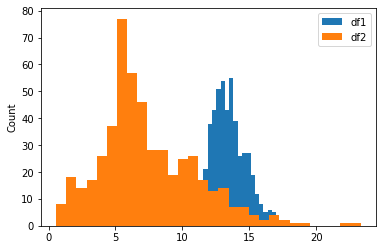

In [3]:
# overlay plots to view distributions
plt.hist(df1, label='df1', bins=30)
plt.hist(df2, label='df2', bins=30)
plt.legend(); # use semi-colon to supress the output of previous print outs
# add labels
plt.ylabel('Count')

When data at same scale then you're looking distributions and consequently probabilities.

with probability area under graph has to sum to 1, 1 is the total probability

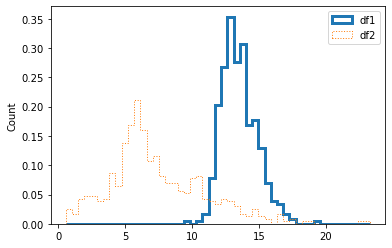

In [4]:
# lets establish bins for one plt, and use that for plots
# use numpy linespace, and find minimum and maximum of both datasets
bins = np.linspace(min(df1.min(), df2.min()), max(df1.max(), df2.max()))# start, stop, bins

# if density is equal to true the count will be converted to probabilty
# make additional adjustments by adding, histtype, linestyle, and linewidth 
plt.hist(df1, bins=bins, label='df1', density = True, histtype='step', lw = 3)
plt.hist(df2, bins=bins, label='df2', density = True, histtype='step', ls = ':')
plt.legend()
plt.ylabel('Count');

Alternative to the above code with less code using seaborn

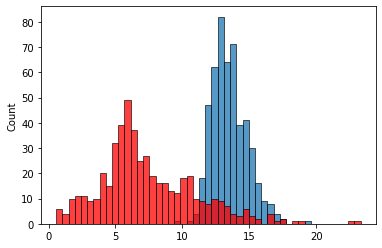

In [5]:
# alternative of using plt, with sns
sns.histplot(df1, bins=bins)
sns.histplot(df2, bins=bins, color='r');

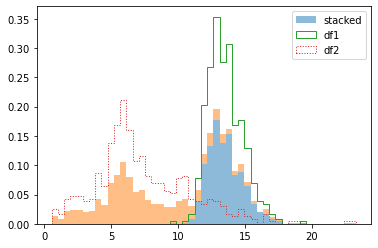

In [6]:
## can add multiple datasets to the plot function which will build a stack plot
## the stacked area shows over lap of two sets
plt.hist([df1, df2], bins=bins, label='stacked', density = True, histtype= 'barstacked', alpha = 0.5)
plt.hist(df1, bins=bins, label='df1', density = True, histtype='step', lw = 1)
plt.hist(df2, bins=bins, label='df2', density = True, histtype='step', ls = ':')
plt.legend();

## 2. Bee-Swarm

In [7]:
# read np arrays into dataframe
# concat arrary and index them as 0 and 1 to identify which is which
dataset = pd.DataFrame({'value': np.concatenate((df1, df2)), 
                        'type': np.concatenate((np.zeros(df1.shape), (np.ones(df2.shape))))
                        })
# check dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
 1   type    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


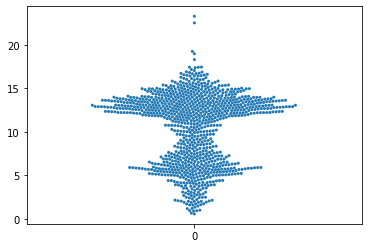

In [8]:
# plot visual
# each circle is a data point
# if points don't fit in the graph, you can reduce visuals using size
sns.swarmplot(data=dataset.value, size=3);

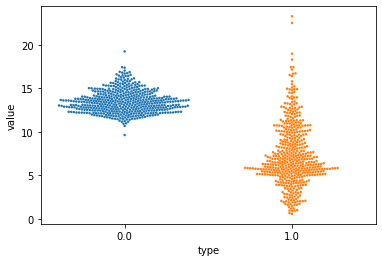

In [9]:
# view individual data point, and fit plot
# in this visual, data tails are highly visable and peaks can also be identified
## utility of this plot increases as the data becomes more **Categorical**
sns.swarmplot(x='type', y='value', data=dataset, size=2.5);

## 3. Box plots
Box plots are good to see bunch of distributions. Quartiles define how data is distributed. Interquartile range of box plots by default is 1.5x

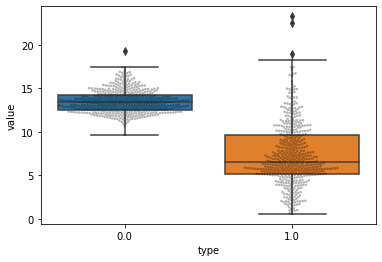

In [10]:
# sns by default will assume anything outside this range will by outlier
# this can be changed by using the defaultg argument **whis and setting the range manually
sns.boxplot(x='type', y='value', data=dataset, whis=2)
# overlay a swarmplot and see data distribution
sns.swarmplot(x='type', y='value', data=dataset, size=2.5, color='k', alpha=0.3);

## 4. Violin plots
Use violin plots vs. Box plots!! you can see density estimate vs. a plain box!

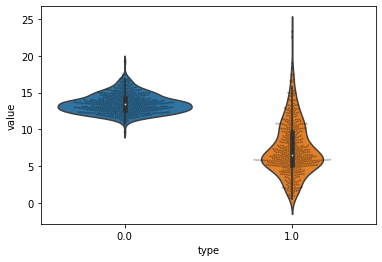

In [11]:
sns.violinplot(x='type', y='value', data=dataset)
# overlay a swarmplot and see data distribution
sns.swarmplot(x='type', y='value', data=dataset, size=2, color='k', alpha=0.3);

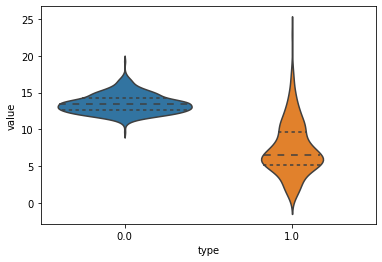

In [12]:
# can view interquartile ranges via argument inner
sns.violinplot(x='type', y='value', data=dataset, inner='quartile');

The plot is very smooth, however, we don't have as many data points. This can be modified via the bandwidth function, bw is automatically calculated by scipy.
Note:
* if you under smooth data you'll just get noise
* if you over smooth, you can lose interesting features

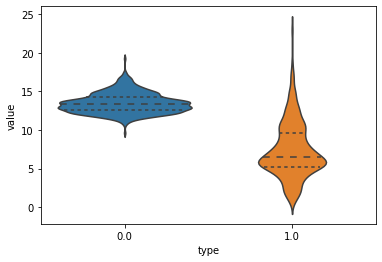

In [13]:
sns.violinplot(x='type', y='value', data=dataset, inner='quartile', bw=0.2);

## 5. Empirical Cumulative Distribution Function (CDF)
can get the informtion out of a histogram plot without the weakness of bining!

In [14]:
# lets sort datapoints and plot them with their respective histograms
sdf1 = np.sort(df1)
sdf2 = np.sort(df2)

print(sdf1[:10], sdf2[:10])

[ 9.64  10.688 10.947 10.995 11.168 11.173 11.254 11.299 11.407 11.435] [0.568 0.655 0.905 0.934 0.948 1.002 1.176 1.201 1.34  1.471]


In [15]:
# CDF values range from 0-1, can obtain them from numpy line-space
# 1/df1.size, defines how much each data point contributes to the percentile
cdf = np.linspace(start=1/df1.size, stop=1, num=df1.size)
print(cdf[:10])

[0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02 ]


Lets plot them, superimpose with the corresponding histplot. Areas with tight distributions, you get steep inclines. Areas with long tails you get platu at the end.

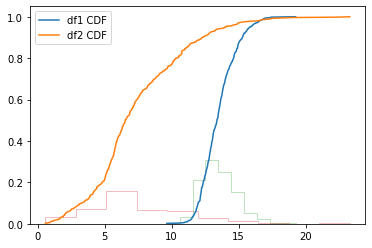

In [16]:
plt.plot(sdf1, cdf, label='df1 CDF')
plt.plot(sdf2, cdf, label='df2 CDF')
plt.hist(df1, density=True, histtype='step', alpha=0.3)
plt.hist(df2, density=True, histtype='step', alpha=0.3)
plt.legend();